# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Буду использовать датасет [House Prices: Advanced Regression Techniques.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('train.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(1460, 81)

In [4]:
# типы колонок
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1460


# Обработка пропусков в данных

Удаление колонок, содержащих пустые значения
`data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`data.dropna(axis=0, how='any')`

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1460, 81), (1460, 62))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1460, 81), (0, 81))

In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Импутация данных

### Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка LotFrontage. Тип данных float64. Количество пустых значений 259, 17.74%.
Колонка MasVnrArea. Тип данных float64. Количество пустых значений 8, 0.55%.
Колонка GarageYrBlt. Тип данных float64. Количество пустых значений 81, 5.55%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


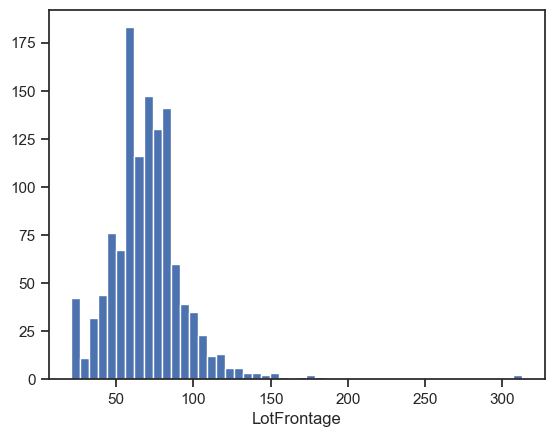

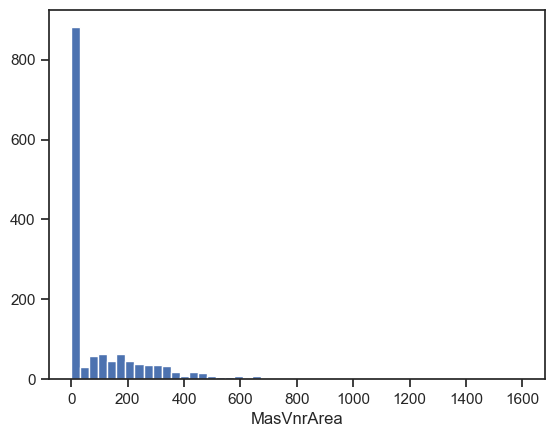

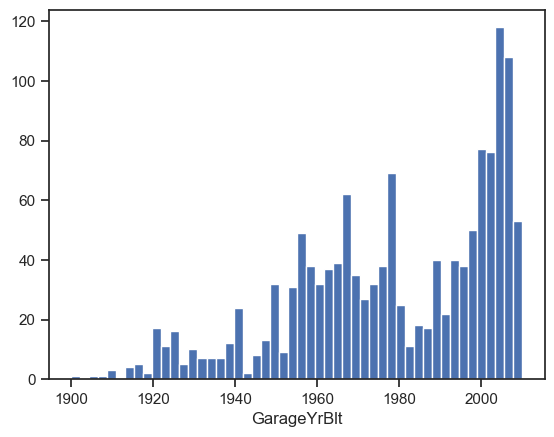

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импутации библиотеки scikit-learn.

In [15]:
data_num_MasVnrArea = data_num[['MasVnrArea']]
data_num_MasVnrArea.head()

,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

:С помощью класса SimpleImputer можно проводить импутацию различными показателями центра распределения

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([103.68526171, 103.68526171, 103.68526171, 103.68526171,
        103.68526171, 103.68526171, 103.68526171, 103.68526171]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median', array([0., 0., 0., 0., 0., 0., 0., 0.]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([0., 0., 0., 0., 0., 0., 0., 0.]))

### Обработка пропусков в категориальных данных

In [23]:
# Выберем категориальные колонки с пропущенными значениями
cat_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Alley. Тип данных object. Количество пустых значений 1369, 93.77%.
Колонка MasVnrType. Тип данных object. Количество пустых значений 872, 59.73%.
Колонка BsmtQual. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtCond. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtExposure. Тип данных object. Количество пустых значений 38, 2.6%.
Колонка BsmtFinType1. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtFinType2. Тип данных object. Количество пустых значений 38, 2.6%.
Колонка Electrical. Тип данных object. Количество пустых значений 1, 0.07%.
Колонка FireplaceQu. Тип данных object. Количество пустых значений 690, 47.26%.
Колонка GarageType. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageFinish. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageQual. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageCond. Тип данных object. Количество пустых значений 81, 5.

In [24]:
cat_temp_data = data[['MasVnrType']]
cat_temp_data.head()

,MasVnrType
0,BrkFace
1,NaN
2,BrkFace
3,NaN
4,BrkFace


In [25]:
cat_temp_data['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [26]:
# Импутация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['BrkFace'],
       ['BrkFace'],
       ['BrkFace'],
       ...,
       ['BrkFace'],
       ['BrkFace'],
       ['BrkFace']], dtype=object)

In [27]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['BrkCmn', 'BrkFace', 'Stone'], dtype=object)

In [28]:
# Импутация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['BrkFace'],
       ['NA'],
       ['BrkFace'],
       ...,
       ['NA'],
       ['NA'],
       ['NA']], dtype=object)

# Преобразование категориальных признаков в числовые

In [29]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,BrkFace
1,BrkFace
2,BrkFace
3,BrkFace
4,BrkFace
...,...
1455,BrkFace
1456,Stone
1457,BrkFace
1458,BrkFace


## Кодирование категориальных признаков целочисленными значениями

Буду использовать класс LabelEncoder, он ориентирован на применение к одному признаку.

### Использование LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cat_enc['c1'].unique()

array(['BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [32]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [33]:
# Наименования категорий в соответствии с порядковыми номерами

le.classes_

array(['BrkCmn', 'BrkFace', 'Stone'], dtype=object)

In [34]:
cat_enc_le

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
np.unique(cat_enc_le)

array([0, 1, 2])

# Масштабирование данных

Распространены два подхода:
- MinMax масштабирование:

В этом случае значения лежат в диапазоне от 0 до 1.

- Масштабирование данных на основе Z-оценки:

В этом случае большинство значений попадает в диапазон от -3 до 3.


In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## MinMax масштабирование

In [37]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['SalePrice']])

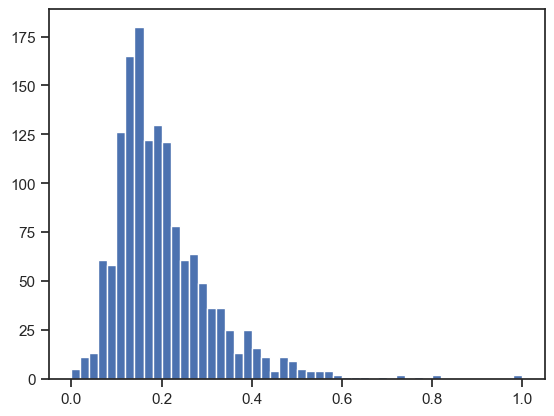

In [38]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки

In [39]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['SalePrice']])

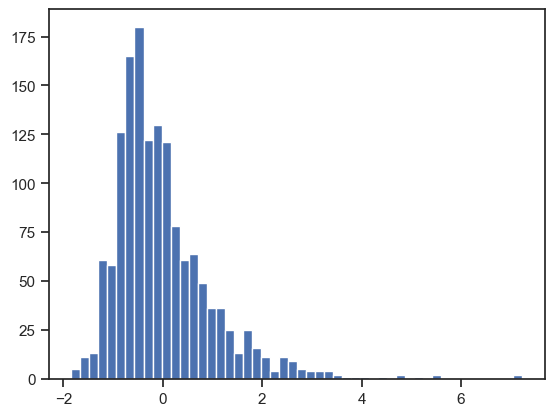

In [40]:
plt.hist(sc2_data, 50)
plt.show()